In [1]:
# nacitanie kniznic
import numpy as np # praca s poliami, matice, linearna algebra
import pandas as pd # spracovanie a analyza dat
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2 # openCV, praca s grafikou
import os # pouzitie funkcii zavislych na os

In [2]:
# nastavenie ciest k datasetom obrazkov, ulozene v root priecinku
trening_kone_cesta = ("horse-or-human/train/horses/") # path k trenovacim obrazkom pre koniky
trening_ludia_cesta = ("horse-or-human/train/humans/") # path k trenovacim obrazkom pre ludi
test_kone_cesta = ("horse-or-human/validation/horses/") # path k testovacim obrazkom pre kone
test_ludia_cesta = ("horse-or-human/validation/humans/") # path k testovacim obrazkom pre ludi

float32
(300, 300)


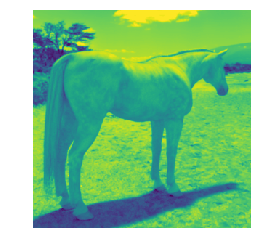

In [3]:
# nacitanie jedneho obrazku, aby som videl ako vyzera, ake data nacitavam, ako vyzera vysledny obrazok - teda aj matica, s ktorou pracujem
priklad = img.imread("horse-or-human/train/horses/horse01-6.png")
priklad = cv2.cvtColor(priklad, cv2.COLOR_BGR2GRAY) # vytvorenie matice 2D obrazku, pouzivam funkciu z kniznice cv2 
print(priklad.dtype)
print(priklad.shape)
plt.imshow(priklad)
plt.axis('off')
plt.show()

In [4]:
# pre kazdy dataset (trenovaci, testovaci) si vytvorim pole, ktore bude drzat matice obrazkov 
trening_kone = []
trening_ludia = []
test_kone = []
test_ludia = []
# naplnenie pola trening_kone
# prechadzam po vsetkych obrazkoch z priecinka ~/train/horses/
for png in os.listdir(trening_kone_cesta):
    imageread = img.imread(trening_kone_cesta+png)
    imageread = cv2.cvtColor(imageread, cv2.COLOR_BGR2GRAY)
    trening_kone.append(imageread)
    #print(imgread.shape) # (300, 300)

print(len(trening_kone) , "obrazkov koni v priecinku s trenovacimi datami pre kone")

500 obrazkov koni v priecinku s trenovacimi datami pre kone


In [5]:
# naplnenie pola trening_ludia
# prechadzam po vsetkych obrazkoch z priecinka ~/train/humans/
for png in os.listdir(trening_ludia_cesta):
    imageread = img.imread(trening_ludia_cesta+png)
    imageread = cv2.cvtColor(imageread, cv2.COLOR_BGR2GRAY)
    trening_ludia.append(imageread)
    # print(imageread.shape) # (300, 300)
    
print(len(trening_ludia) , "obrazkov ludi v priecinku s trenovacimi datami pre ludi") 

527 obrazkov ludi v priecinku s trenovacimi datami pre ludi


In [6]:
# zlucenie trenovacich arrayov, len pre overenie, ci sa spracovali vsetky obrazky
trenovacie_obrazky = np.concatenate((trening_ludia, trening_kone), axis = 0)
print("Spolu vsetkych trenovacich obrazkov :",trenovacie_obrazky.shape)
# ocakavam vysledok 1027, 300, 300. 1027 obrazkov by sa malo uspesne spracovat s rozmermi 300x300

Spolu vsetkych trenovacich obrazkov : (1027, 300, 300)


In [7]:
# naplnenie pola test_kone
# prechadzam po vsetkych obrazkoch z priecinka ~/validation/horses/
for png in os.listdir(test_kone_cesta):
    imageread = img.imread(test_kone_cesta+png)
    imageread = cv2.cvtColor(imageread, cv2.COLOR_BGR2GRAY)
    test_kone.append(imageread)
    #print(imgread.shape) # (300, 300)
    
print(len(test_kone), "obrazkov koni v priecinku s testovacimi datami pre kone")

128 obrazkov koni v priecinku s testovacimi datami pre kone


In [8]:
# naplnenie pola test_ludia
# prechadzam po vsetkych obrazkoch z priecinka ~/validation/humans/
for png in os.listdir(test_ludia_cesta):
    imageread = img.imread(test_ludia_cesta+png)
    imageread = cv2.cvtColor(imageread, cv2.COLOR_BGR2GRAY)
    test_ludia.append(imageread)
    #print(imgread.shape) # (300, 300)
print(len(test_ludia), "obrazkov ludi v priecinku s testovacimi datami pre ludi")

128 obrazkov ludi v priecinku s testovacimi datami pre ludi


In [9]:
# zlucenie trenovacich arrayov, len pre overenie, ci sa spracovali vsetky obrazky
testovacie_obrazky = np.concatenate((test_kone, test_ludia), axis = 0)
print("All validation images :",testovacie_obrazky.shape)
# ocakavam vysledok 256, 300, 300. 256 obrazkov by sa malo uspesne spracovat s rozmermi 300x300

All validation images : (256, 300, 300)


In [10]:
x_data = np.concatenate((trening_ludia, test_ludia, trening_kone, test_kone), axis=0)
print(x_data.shape[0],"obrazkov ",x_data.shape[1],"x",x_data.shape[2],"pixelov.")

1283 obrazkov  300 x 300 pixelov.


In [11]:
# vytvorenie klasifikacie dat
# 0 -> kone
# 1 -> ludia
zero = np.zeros(len(trening_kone) + len(test_kone)) # vsetky obrazky koni
one = np.ones(len(trening_ludia) + len(test_ludia)) # vsetky obrazky ludi
print("Celkovy pocet obrazkov ludi :", one.size)
print("Celkovy pocet obrazkov koni :", zero.size)

Celkovy pocet obrazkov ludi : 655
Celkovy pocet obrazkov koni : 628


In [12]:
y = np.concatenate((zero, one), axis= 0).reshape(-1,1)
print(y[:10])
print(y[-10:])

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size = 0.3, random_state = 42)

number_of_train = x_train.shape[0]
number_of_test  = x_test.shape[0]

print("pocet trenovacich dat :", number_of_train)
print("pocet testovacich dat :", number_of_test)

pocet trenovacich dat : 898
pocet testovacich dat : 385


In [14]:
# konvertovanie povodneho pola
# funkciou reshape (zmena tvaru) dostanem z povodnych hodnot 300x300 -> 90000, ako keby som 2D obraz chcel zobrazit v 1D 
x_train_flatten = x_train.reshape(number_of_train, x_train.shape[1] * x_train.shape[2])
x_test_flatten = x_test.reshape(number_of_test, x_test.shape[1] * x_test.shape[2])

print("X train Flatten : ",x_train_flatten.shape)
print("X test Flatten : ",x_test_flatten.shape)
x_train = x_train_flatten
x_test = x_test_flatten

X train Flatten :  (898, 90000)
X test Flatten :  (385, 90000)


In [15]:
# import kniznice keras
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:455: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:456: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/nbuser/anaconda3_420/lib/pyth

In [16]:
# vytvorenie funkcie pre klasifikaciu - neuronova siet
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 50, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1])) # 1. skryta vrstva
    classifier.add(Dense(units = 40, kernel_initializer = 'uniform', activation = 'relu')) # 2. skryta vrstva
    classifier.add(Dense(units = 30, kernel_initializer = 'uniform', activation = 'relu')) # 3. skryta vrstva
    classifier.add(Dense(units = 20, kernel_initializer = 'uniform', activation = 'relu')) # 4. skryta vrstva
    #classifier.add(Dense(units = 20, kernel_initializer = 'uniform', activation = 'relu')) # netreba
    #classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu')) # netreba
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid')) # vystupna vrstva
    
    classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
    return classifier

In [17]:
# zavolanie funkcie, ktora vracia klasifikaciu, ulozim ju do premennej cf, na ktorej potom pustim fuknciu "fit" 
cf = build_classifier()
X = x_train
Y = y_train
# verbose=2 -> step-by-step vypis kazdeho epochu
# epoch -> pocet, kolkokrat chcem prejst vsetkymi trenovacimi datami odpredu a odzadu
# batch_size -> pocet vzoriek pouzitych pri jednom prechode
history = cf.fit(X, Y, validation_split=0.33, epochs=100, batch_size=20, verbose=2)

Train on 601 samples, validate on 297 samples
Epoch 1/100
4s - loss: 0.6930 - acc: 0.4875 - val_loss: 0.6915 - val_acc: 0.4444
Epoch 2/100
2s - loss: 0.6768 - acc: 0.5291 - val_loss: 0.7087 - val_acc: 0.4983
Epoch 3/100
3s - loss: 0.5709 - acc: 0.7072 - val_loss: 0.8631 - val_acc: 0.6599
Epoch 4/100
3s - loss: 0.5677 - acc: 0.7088 - val_loss: 0.5638 - val_acc: 0.6835
Epoch 5/100
2s - loss: 0.5892 - acc: 0.6872 - val_loss: 0.5164 - val_acc: 0.7205
Epoch 6/100
3s - loss: 0.4636 - acc: 0.7754 - val_loss: 0.5415 - val_acc: 0.7374
Epoch 7/100
3s - loss: 0.4347 - acc: 0.7970 - val_loss: 0.5056 - val_acc: 0.7508
Epoch 8/100
2s - loss: 0.3998 - acc: 0.8186 - val_loss: 0.4980 - val_acc: 0.7609
Epoch 9/100
2s - loss: 0.4069 - acc: 0.8336 - val_loss: 0.6244 - val_acc: 0.6902
Epoch 10/100
3s - loss: 0.4560 - acc: 0.7837 - val_loss: 0.5139 - val_acc: 0.7273
Epoch 11/100
2s - loss: 0.3952 - acc: 0.8303 - val_loss: 0.5479 - val_acc: 0.7374
Epoch 12/100
2s - loss: 0.3859 - acc: 0.8270 - val_loss: 0.58

dict_keys(['val_acc', 'loss', 'val_loss', 'acc'])


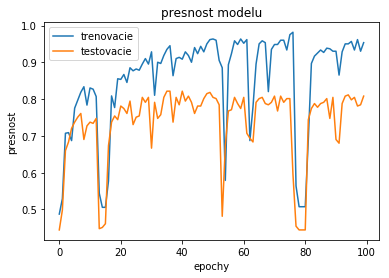

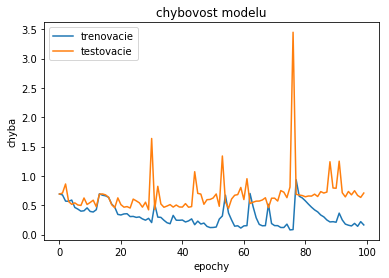

In [18]:
# vypis klucov (dat), ktore mam v premennej keys, aby som vedel ake "nazvy" parametrov pouzit pri zobrazovani
print(history.history.keys())
# graf pre presnost vypoctov
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('presnost modelu')
plt.ylabel('presnost')
plt.xlabel('epochy')
plt.legend(['trenovacie', 'testovacie'], loc='upper left')
plt.show()
# graf chybovosti
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('chybovost modelu')
plt.ylabel('chyba')
plt.xlabel('epochy')
plt.legend(['trenovacie', 'testovacie'], loc='upper left')
plt.show() 

In [19]:
trainPrediction = cf.predict(x_train)
testPrediction = cf.predict(x_test)

print("Presnost trenovania : {}%".format(100 - np.mean(np.abs(trainPrediction - y_train)) * 100))
print("Presnost testovania : {}%".format(100 - np.mean(np.abs(testPrediction - y_test)) * 100)) 

Presnost trenovania : 88.09980215635737%
Presnost testovania : 81.88512258312632%
